<a href="https://colab.research.google.com/github/jhoselin48/SSF-Oto25JhoselinMarisolConstantinoEstrada/blob/main/SSF_T11_Constantino_Estrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [29]:
df = pd.read_excel("S1_Dataset.xlsx")

print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Sex,Age,BADS-SF,BADS-SF_Activation,BADS-SF_Avoidance,CES-D,WHOQOL-26_Mean total score,WHOQOL-26_Phisical health,WHOQOL-26_Psychological health,WHOQOL-26_Social relationships,WHOQOL-26_Environment,WHOQOL-26_Overall QOL
0,2,20,37,22,3,1,4.500000,4.833333,4.142857,5.000000,4.375,4.5
1,2,18,33,17,2,2,3.307692,3.166667,3.571429,2.666667,3.250,4.0
2,1,19,30,20,8,2,3.500000,3.833333,3.285714,3.666667,3.250,4.0
3,1,19,23,11,6,3,3.346154,3.500000,3.571429,4.000000,2.750,3.5
4,2,18,35,19,2,3,4.461538,4.500000,4.857143,5.000000,3.875,4.5


In [30]:
#1. Selección de variables cuantitativas
vars_num = [
    "Age",
    "CES-D",
    "BADS-SF",
    "BADS-SF_Activation",
    "BADS-SF_Avoidance",
    "WHOQOL-26_Mean total score"
]

data = df[vars_num].dropna()

In [31]:
#2. Estadística descriptiva
desc = pd.DataFrame({
    "Media": data.mean(),
    "Mediana": data.median(),
    "Desv. estándar": data.std(),
    "Varianza": data.var()
})

print("\nEstadística descriptiva:")
display(desc)


Estadística descriptiva:


,Media,Mediana,Desv. estándar,Varianza
Age,19.366516,19.000000,1.736392,3.015056
CES-D,15.407240,14.000000,8.046837,64.751584
BADS-SF,23.506787,23.000000,8.086813,65.396545
BADS-SF_Activation,13.018100,13.000000,5.929099,35.154216
BADS-SF_Avoidance,7.511312,7.000000,4.019963,16.160099
WHOQOL-26_Mean total score,3.306300,3.307692,0.562881,0.316835


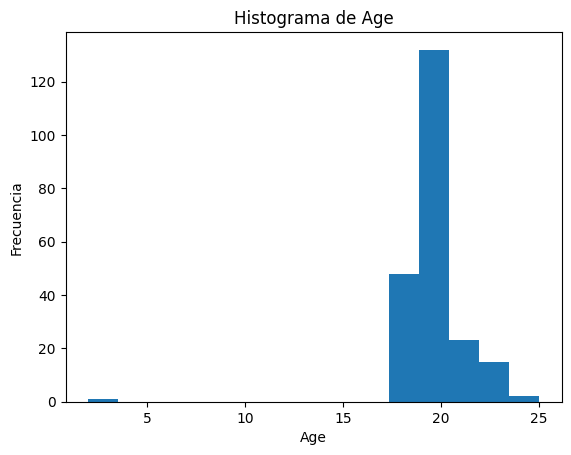

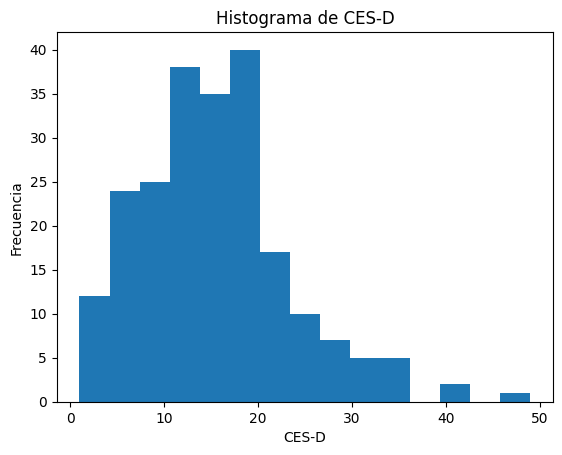

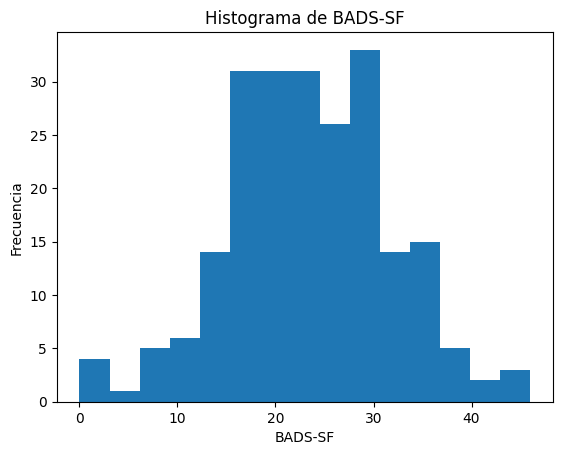

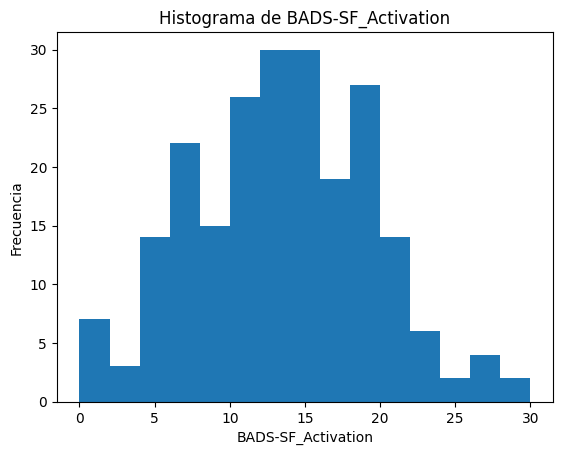

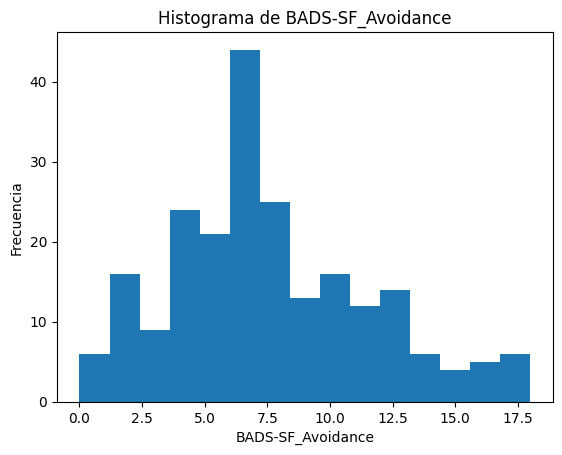

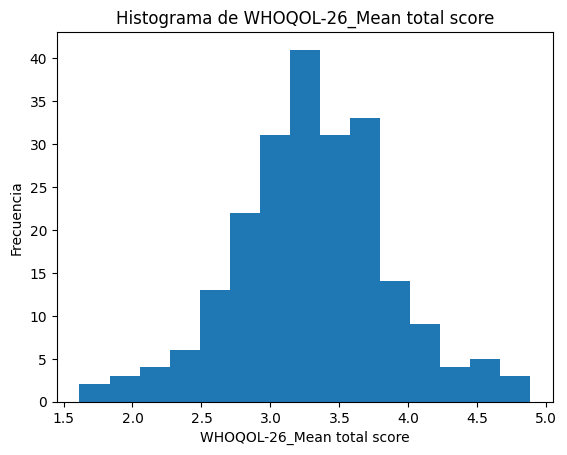

In [32]:
#3. Histogramas
for col in vars_num:
    plt.figure()
    plt.hist(data[col], bins=15)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

In [33]:
#4. Medidas de dispersión (varianza y desviación estándar)
for col in vars_num:
    print(f"{col}: std = {np.std(data[col], ddof=1):.3f}")

Age: std = 1.736
CES-D: std = 8.047
BADS-SF: std = 8.087
BADS-SF_Activation: std = 5.929
BADS-SF_Avoidance: std = 4.020
WHOQOL-26_Mean total score: std = 0.563


In [34]:
#5. Normalidad (scipy.stats.normaltest)
print("\nPruebas de normalidad (D’Agostino-Pearson)\n")
for col in vars_num:
    stat, p = stats.normaltest(data[col])
    print(f"{col:30s} p-valor = {p:.4f}")
    if p < 0.05:
        print("La distribución no es normal\n")
    else:
        print("La distribución es normal\n")


Pruebas de normalidad (D’Agostino-Pearson)

Age                            p-valor = 0.0000
La distribución no es normal

CES-D                          p-valor = 0.0000
La distribución no es normal

BADS-SF                        p-valor = 0.6806
La distribución es normal

BADS-SF_Activation             p-valor = 0.8648
La distribución es normal

BADS-SF_Avoidance              p-valor = 0.0042
La distribución no es normal

WHOQOL-26_Mean total score     p-valor = 0.3688
La distribución es normal



In [35]:
#6. Correlaciones (Pearson [paramétrico] y Spearman [no paramétrico])
pairs = [
    ("CES-D", "WHOQOL-26_Mean total score"),
    ("BADS-SF", "CES-D"),
    ("BADS-SF_Activation", "CES-D")
]

for x, y in pairs:
    r_p, p_p = stats.pearsonr(data[x], data[y])
    r_s, p_s = stats.spearmanr(data[x], data[y])

    print(f"\n{x} vs {y}")
    print(f"Pearson r = {r_p:.3f}, p = {p_p:.4f}")
    print(f"Spearman r = {r_s:.3f}, p = {p_s:.4f}")



CES-D vs WHOQOL-26_Mean total score
Pearson r = -0.580, p = 0.0000
Spearman r = -0.584, p = 0.0000

BADS-SF vs CES-D
Pearson r = -0.553, p = 0.0000
Spearman r = -0.545, p = 0.0000

BADS-SF_Activation vs CES-D
Pearson r = -0.396, p = 0.0000
Spearman r = -0.390, p = 0.0000


In [36]:
#7. Comparación de los dos grupos (t-test)
"""En el tutorial se comparan dos muestras independientes, mientras que aquí se replica usando Sex como variable agrupadora"""
group1 = df[df["Sex"] == 1]["CES-D"].dropna()
group2 = df[df["Sex"] == 2]["CES-D"].dropna()

t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)

print("\nPrueba t de Student (CES-D por sexo)")
print(f"t = {t_stat:.3f}, p = {p_val:.4f}")




Prueba t de Student (CES-D por sexo)
t = 1.300, p = 0.1950
